## Step1: Data Sourcing

In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [115]:
#read the data file
housing_data=pd.read_csv('train.csv')

In [116]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [117]:
housing_data.shape

(1460, 81)

In [118]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [121]:
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Cleaning

In [122]:
df=housing_data

In [123]:
# Change the data type from Integer to object
df['MSSubClass']=df['MSSubClass'].astype('object')

#### **Numerical columns with value 0**

In [124]:
#List of columns with value 0
zero_cols=df.columns[df.eq(0).any()]
zero_cols

Index(['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [126]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,NaN,NaN,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,NaN,NaN,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,NaN,NaN,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,NaN,NaN,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,NaN,NaN,12,2008,WD,Normal,250000


In [125]:
# Replace 0 with null value
df[zero_cols]=df[zero_cols].replace(0,np.NaN )

In [127]:
#Percentage of missing values
round((df[df.columns[df.isnull().any()]].isnull().sum()/len(df))*100,2).sort_values(ascending=False)

PoolQC           99.52
PoolArea         99.52
3SsnPorch        98.36
LowQualFinSF     98.22
MiscVal          96.44
MiscFeature      96.30
BsmtHalfBath     94.38
Alley            93.77
ScreenPorch      92.05
BsmtFinSF2       88.56
EnclosedPorch    85.75
Fence            80.75
HalfBath         62.53
MasVnrArea       59.52
BsmtFullBath     58.63
2ndFlrSF         56.78
WoodDeckSF       52.12
Fireplaces       47.26
FireplaceQu      47.26
OpenPorchSF      44.93
BsmtFinSF1       31.99
LotFrontage      17.74
BsmtUnfSF         8.08
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        5.55
GarageArea        5.55
GarageQual        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtCond          2.53
BsmtFinType1      2.53
BsmtQual          2.53
TotalBsmtSF       2.53
FullBath          0.62
MasVnrType        0.55
BedroomAbvGr      0.41
KitchenAbvGr      0.07
Electrical        0.07
dtype: float64

In [128]:
#Drop columns with missing values >35%
miss_cols=df.columns[(df.isnull().sum()/len(df)*100>35)]
miss_cols

Index(['Alley', 'MasVnrArea', 'BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'Fireplaces', 'FireplaceQu',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'],
      dtype='object')

In [129]:
#Drop columns with missing values >40%
df.drop(miss_cols,axis=1, inplace=True)
df.shape

(1460, 61)

In [130]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [131]:
#Impute LotFrontage missing values with mean
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)

In [132]:
garage_cols=['GarageYrBlt','GarageType','GarageFinish','GarageQual','GarageCond']
garage_cols

['GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

In [134]:
# Drop null values by rows
df.dropna(subset=garage_cols, inplace=True)

In [135]:
df.columns[df.isnull().any()]

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical',
       'FullBath', 'BedroomAbvGr'],
      dtype='object')

In [178]:
drop_cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtUnfSF','MasVnrType', 'Electrical', 'FullBath', 'BedroomAbvGr']
drop_cols

In [179]:
# Drop null values by rows
df.dropna(subset=drop_cols, inplace=True)

In [182]:
#Verify missing value treatment
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 61, dtype: int64

In [185]:
## Extract categorical columns
df_cat = df.select_dtypes(include='object')
df_cat

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1454,20,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,70,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [186]:
## Extract numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,SalePrice
0,1,65.0,8450,7,5,2003,2003,706.0,150.0,856.0,...,2.0,3.0,1.0,8,2003.0,2.0,548.0,2,2008,208500
1,2,80.0,9600,6,8,1976,1976,978.0,284.0,1262.0,...,2.0,3.0,1.0,6,1976.0,2.0,460.0,5,2007,181500
2,3,68.0,11250,7,5,2001,2002,486.0,434.0,920.0,...,2.0,3.0,1.0,6,2001.0,2.0,608.0,9,2008,223500
3,4,60.0,9550,7,5,1915,1970,216.0,540.0,756.0,...,1.0,3.0,1.0,7,1998.0,3.0,642.0,2,2006,140000
4,5,84.0,14260,8,5,2000,2000,655.0,490.0,1145.0,...,2.0,4.0,1.0,9,2000.0,3.0,836.0,12,2008,250000


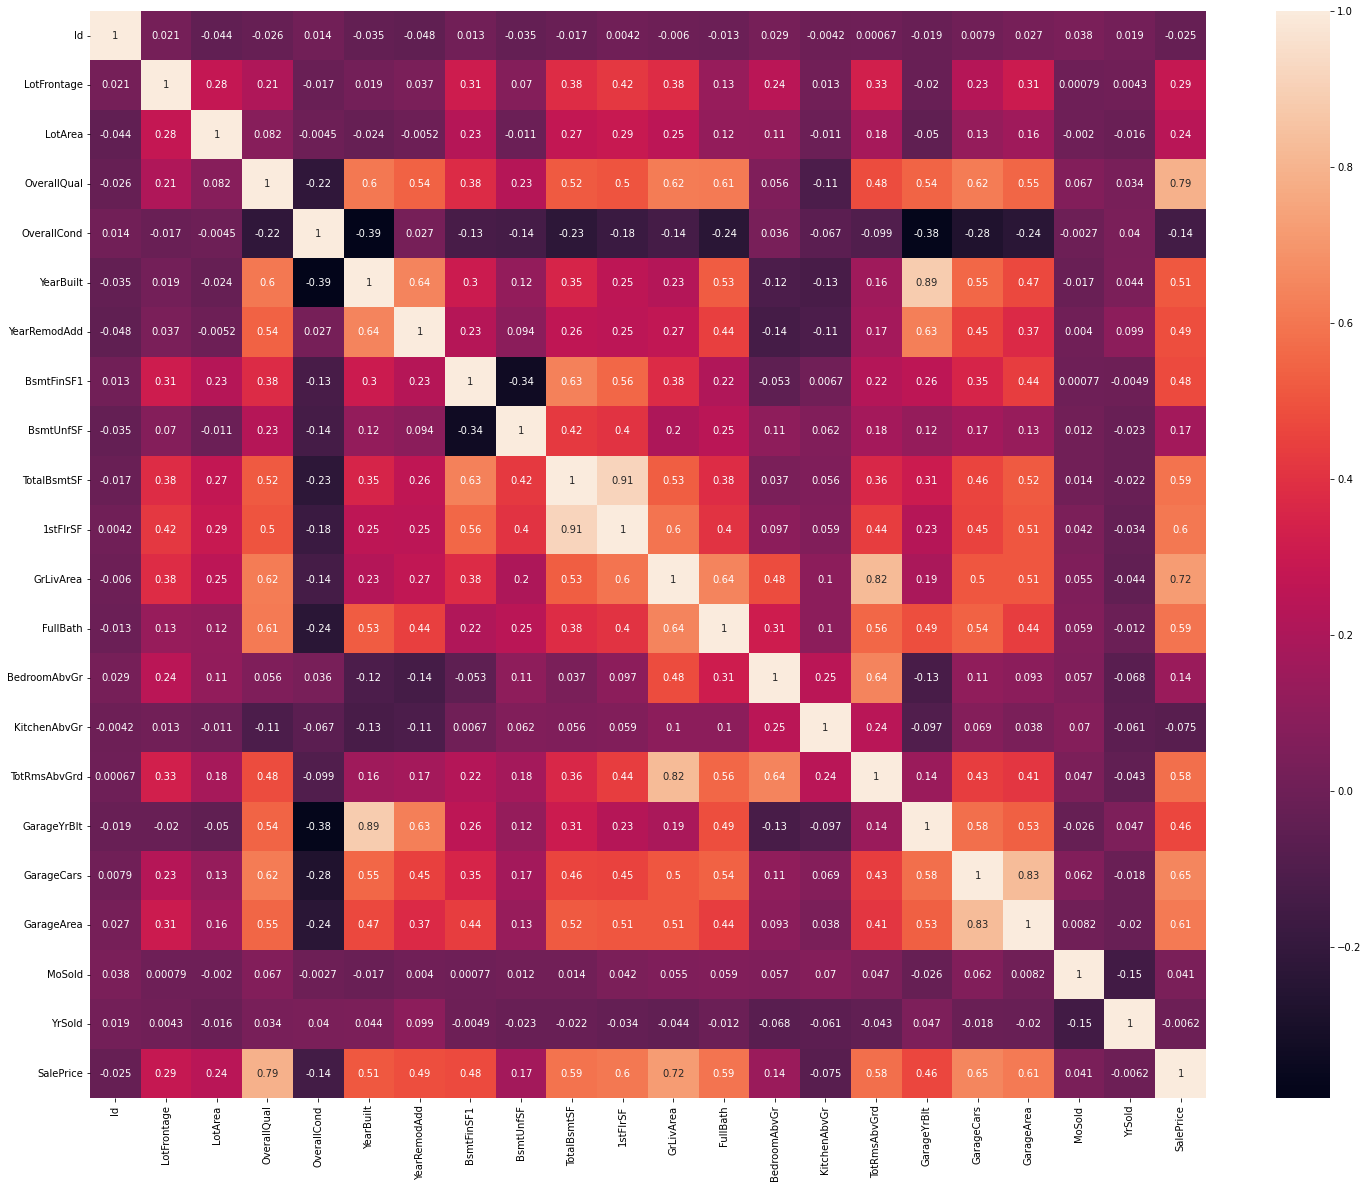

In [187]:
# Plot heatmap to detect correlations among numerical variables
plt.figure(figsize=(25,20))
sns.heatmap(df_num.corr(), annot=True);

In [188]:
#Create a list of categorical variables
cat_cols=df.select_dtypes('object').columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [189]:
# New dataframe of dummies
df_dum=pd.get_dummies(df[cat_cols],drop_first=True)

In [190]:
df_dum.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


concat with original df

In [191]:
df1=pd.concat([df,df_dum], axis=1)
df1.shape

(869, 252)

In [192]:
# Drop original columns of categorical variables
df1.drop(cat_cols, axis=1, inplace=True)
df1.shape

(869, 213)

In [194]:
df1.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,2003,2003,706.0,150.0,856.0,...,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600,6,8,1976,1976,978.0,284.0,1262.0,...,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250,7,5,2001,2002,486.0,434.0,920.0,...,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550,7,5,1915,1970,216.0,540.0,756.0,...,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260,8,5,2000,2000,655.0,490.0,1145.0,...,0,0,0,0,1,0,0,0,1,0


In [202]:
df1.columns[df1.isnull().any()]

Index([], dtype='object')

In [204]:
# Drop id column as it is not a significant predictor
df1.drop('Id', axis=1, inplace=True)
df1.shape

(869, 212)

### Train Data Sets and import required libraries

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Lasso

In [206]:
#Split train and test sets
df_train, df_test=train_test_split(df1, train_size=0.7, test_size=0.3, random_state=100)

In [207]:
num_cols=df1.select_dtypes(exclude='uint8').columns
num_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold',
       'SalePrice'],
      dtype='object')

In [208]:
scaler=MinMaxScaler()

In [209]:
df_train[num_cols]=scaler.fit_transform(df_train[num_cols])
df_test[num_cols]=scaler.transform(df_test[num_cols])

In [210]:
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
629,0.378882,0.036084,0.428571,0.428571,0.640625,0.233333,0.275465,0.118002,0.306818,0.315847,...,0,0,0,0,1,0,0,0,1,0
551,0.180124,0.021968,0.285714,0.571429,0.585938,0.116667,0.135518,0.260982,0.193182,0.162113,...,0,0,0,0,1,0,0,0,1,0
484,0.304658,0.030185,0.285714,0.714286,0.625000,0.850000,0.259522,0.170973,0.218395,0.187978,...,0,0,0,0,1,0,0,0,1,0
1426,0.372671,0.045077,0.571429,0.428571,0.875000,0.733333,0.441984,0.090009,0.297940,0.269581,...,0,0,0,0,1,0,0,0,1,0
100,0.304658,0.043483,0.428571,0.714286,0.742188,0.850000,0.530558,0.170543,0.435369,0.410565,...,0,0,0,0,1,0,0,0,1,0


In [211]:
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
629,0.378882,0.036084,0.428571,0.428571,0.640625,0.233333,0.275465,0.118002,0.306818,0.315847,...,0,0,0,0,1,0,0,0,1,0
551,0.180124,0.021968,0.285714,0.571429,0.585938,0.116667,0.135518,0.260982,0.193182,0.162113,...,0,0,0,0,1,0,0,0,1,0
484,0.304658,0.030185,0.285714,0.714286,0.625000,0.850000,0.259522,0.170973,0.218395,0.187978,...,0,0,0,0,1,0,0,0,1,0
1426,0.372671,0.045077,0.571429,0.428571,0.875000,0.733333,0.441984,0.090009,0.297940,0.269581,...,0,0,0,0,1,0,0,0,1,0
100,0.304658,0.043483,0.428571,0.714286,0.742188,0.850000,0.530558,0.170543,0.435369,0.410565,...,0,0,0,0,1,0,0,0,1,0


In [212]:
y_train=df_train.pop('SalePrice')
x_train=df_train

In [213]:
y_test=df_test.pop('SalePrice')
x_test=df_test

In [214]:
y_train.shape

(608,)

In [215]:
x_train.shape

(608, 211)

In [216]:
y_test.shape

(261,)

In [217]:
x_test.shape

(261, 211)

## Model building using Linear Regression

In [218]:
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [219]:
y_train_pred=lr.predict(x_train)

In [220]:
y_train_pred=lr.predict(x_train)

In [221]:
r2_score(y_train,y_train_pred)

0.9361417591929063

In [222]:
mean_squared_error(y_train,y_train_pred)

0.0010044238195368615

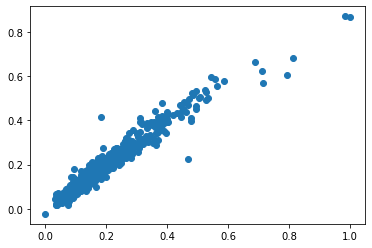

In [223]:
plt.scatter(y_train,y_train_pred)
plt.show()

In [224]:
y_test_pred=lr.predict(x_test)
r2_score(y_test,y_test_pred)

-1.735318643285256e+23

In [225]:
mean_squared_error(y_test,y_test_pred)

1.6830573547175878e+21

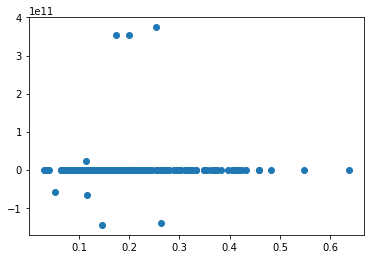

In [226]:
plt.scatter(y_test,y_test_pred)
plt.show()

### Model using Ridge Regression

In [227]:
#List of lambda values for iteration
lambdas=[0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [228]:
for lam in lambdas:
    ridge=Ridge(alpha=lam)
    ridge.fit(x_train, y_train)
    y_train_pred=ridge.predict(x_train)
    print(lam,'------',r2_score(y_train, y_train_pred))

0 ------ 0.9345809336086357
0.001 ------ 0.9406085472122097
0.01 ------ 0.9405045354047026
0.1 ------ 0.9389089522253462
1 ------ 0.9287177825181184
10 ------ 0.8946371230650747
100 ------ 0.7620908918670576
1000 ------ 0.4406075636421316


In [229]:
ridge=Ridge(alpha=0.01)
ridge.fit(x_train, y_train)

Ridge(alpha=0.01)

In [230]:
y_train_pred=ridge.predict(x_train)

#### Model Evaluation

In [231]:
r2_score(y_train, y_train_pred)

0.9405045354047026

In [232]:
mean_squared_error(y_train, y_train_pred)

0.000935801879892853

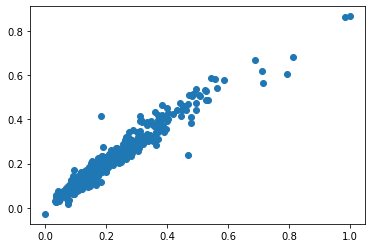

In [233]:
plt.scatter(y_train, y_train_pred)
plt.show()

#### Test Set Evaluation

In [234]:
y_test_pred=ridge.predict(x_test)
r2_score(y_test, y_test_pred)

0.41107036845910083

In [235]:
mean_squared_error(y_test, y_test_pred)

0.005711932800419371

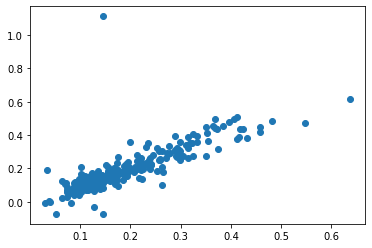

In [236]:
plt.scatter(y_test, y_test_pred)
plt.show()

### Lasso 

In [237]:
for lam in lambdas:
    lasso=Lasso(alpha=lam)
    lasso.fit(x_train, y_train)
    y_train_pred=lasso.predict(x_train)
    print(lam,'------',r2_score(y_train, y_train_pred))

0 ------ 0.9404662214060441
0.001 ------ 0.8580308029001674
0.01 ------ 0.45115437007068004
0.1 ------ 0.0
1 ------ 0.0
10 ------ 0.0
100 ------ 0.0
1000 ------ 0.0


In [238]:
lasso=Lasso(alpha=0)
lasso.fit(x_train, y_train)

Lasso(alpha=0)

In [239]:
y_train_pred=lasso.predict(x_train)

#### Train Set

In [240]:
r2_score(y_train, y_train_pred)

0.9404662214060441

In [241]:
mean_squared_error(y_test, y_test_pred)

0.005711932800419371

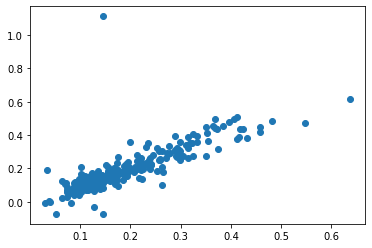

In [242]:
plt.scatter(y_test, y_test_pred)
plt.show()

#### Test Set

In [244]:
y_test_pred=lasso.predict(x_test)

In [245]:
r2_score(y_test, y_test_pred)

0.3882077917849257

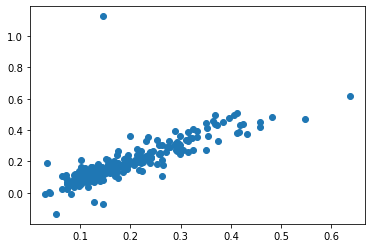

In [246]:
plt.scatter(y_test, y_test_pred)
plt.show()